In [1]:
from langgraph.graph import StateGraph ,START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()
model = ChatOpenAI(model="gpt-5-nano-2025-08-07")

In [3]:
class PromptChainState(TypedDict):
    topic: str
    outline: str
    report: str

In [4]:
def create_outline(state: PromptChainState) -> PromptChainState:
    prompt = f"Create detailed outline on the topic: {state['topic']} so that i can generate blog post from that output"
    state["outline"] = model.invoke(prompt).content
    return state

def generate_report(state: PromptChainState) -> PromptChainState:
    prompt = f"Generate a detailed report on the topic: {state['topic']} using the outline: {state['outline']}"
    state["report"] = model.invoke(prompt).content
    return state

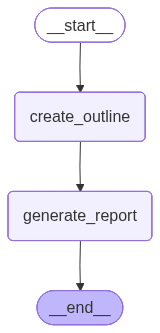

In [5]:
graph =StateGraph(PromptChainState)

graph.add_node("create_outline", create_outline)
graph.add_node("generate_report", generate_report)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "generate_report")
graph.add_edge("generate_report", END)

workflow = graph.compile()
workflow

In [ ]:
workflow.invoke({"topic": "AI in India and how it will affect Job Market"})